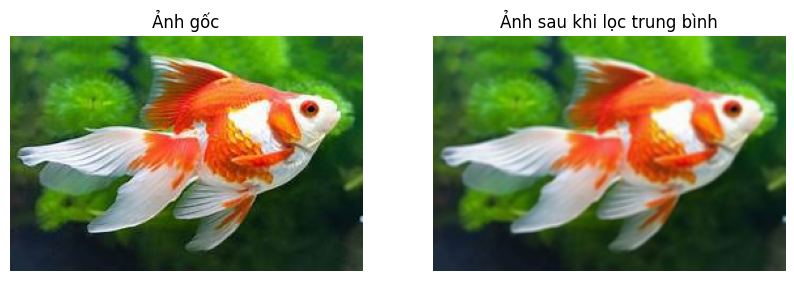

In [1]:
# Bộ lọc trung bình (Mean Filter) cho ảnh

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh từ file
img = cv2.imread('a.jpg', cv2.IMREAD_COLOR)  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Áp dụng mean filter với kernel 3x3
mean_filtered = cv2.blur(img, (3, 3))
mean_filtered_rgb = cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh gốc và ảnh đã lọc
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Ảnh gốc')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Ảnh sau khi lọc trung bình')
plt.imshow(mean_filtered_rgb)
plt.axis('off')

plt.show()

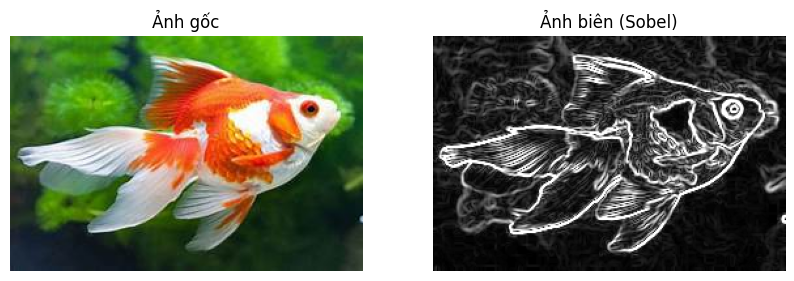

In [2]:
# Bộ lọc xác định biên (Edge Detection) cho ảnh

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh từ file
img = cv2.imread('a.jpg', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("Không tìm thấy file ảnh 'a.jpg'. Kiểm tra lại đường dẫn hoặc tên file.")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Áp dụng Sobel filter để xác định biên
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  # Biên theo trục x
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)  # Biên theo trục y
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.clip(sobel, 0, 255))

# Hiển thị ảnh gốc và ảnh biên
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Ảnh gốc')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Ảnh biên (Sobel)')
plt.imshow(sobel, cmap='gray')
plt.axis('off')

plt.show()

In [5]:
import cv2
import numpy as np

# Đọc ảnh từ file
img = cv2.imread('a.jpg', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("Không tìm thấy file ảnh 'a.jpg'. Kiểm tra lại đường dẫn hoặc tên file.")

# Tạo hệ số ngẫu nhiên cho từng kênh màu (giá trị từ 0.5 đến 1.5)
np.random.seed()  # Đảm bảo mỗi lần chạy ra kết quả khác nhau
random_factors = np.random.uniform(0.5, 1.5, size=3)

# Nhân từng kênh với hệ số ngẫu nhiên và giới hạn giá trị trong [0, 255]
img_random = img.astype(np.float32)
for i in range(3):  # BGR
    img_random[:, :, i] *= random_factors[i]
img_random = np.clip(img_random, 0, 255).astype(np.uint8)

# Lưu ảnh mới ra file
cv2.imwrite('a_random_color.jpg', img_random)
print("Đã lưu ảnh với màu ngẫu nhiên vào file 'a_random_color.jpg'")

Đã lưu ảnh với màu ngẫu nhiên vào file 'a_random_color.jpg'


In [6]:
import cv2
import numpy as np

# Đọc ảnh từ file
img = cv2.imread('a.jpg', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("Không tìm thấy file ảnh 'a.jpg'. Kiểm tra lại đường dẫn hoặc tên file.")

# Chuyển ảnh sang không gian màu HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tách các kênh Hue, Saturation, Value
hue, saturation, value = cv2.split(img_hsv)

# Lưu từng kênh thành ảnh grayscale
cv2.imwrite('a_hue.jpg', hue)
cv2.imwrite('a_saturation.jpg', saturation)
cv2.imwrite('a_value.jpg', value)
print("Đã lưu các kênh HSV thành a_hue.jpg, a_saturation.jpg, a_value.jpg")

Đã lưu các kênh HSV thành a_hue.jpg, a_saturation.jpg, a_value.jpg


In [7]:
import cv2
import numpy as np
import os

def inverse_transform(img):
    """Biến đổi nghịch đảo ảnh (âm bản)"""
    return 255 - img

def process_images(image_paths, transform_func, out_suffix):
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Không đọc được ảnh: {path}")
            continue
        img_trans = transform_func(img)
        out_path = f"{os.path.splitext(path)[0]}_{out_suffix}.jpg"
        cv2.imwrite(out_path, img_trans)
        print(f"Đã lưu: {out_path}")

def main():
    print("=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Image inverse transformation (âm bản)")
    print("0. Thoát")
    choice = input("Chọn phương pháp (nhập số): ")

    if choice == "0":
        print("Kết thúc chương trình.")
        return

    image_folder = input("Nhập đường dẫn thư mục chứa ảnh: ").strip()
    if not os.path.isdir(image_folder):
        print("Thư mục không tồn tại.")
        return

    # Lấy danh sách file ảnh (jpg, png)
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_paths:
        print("Không tìm thấy ảnh trong thư mục.")
        return

    if choice == "1":
        process_images(image_paths, inverse_transform, "inverse")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()

=== MENU BIẾN ĐỔI ẢNH ===
1. Image inverse transformation (âm bản)
0. Thoát
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\a_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\a_hue_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\a_random_color_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\a_saturation_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\a_value_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\colorful-ripe-tropical-fruits_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\image1_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\image2_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\image3_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\pagoda_inverse.jpg
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\quang_ninh_inverse.jpg


In [8]:
import cv2
import numpy as np
import os

def inverse_transform(img):
    """Biến đổi nghịch đảo ảnh (âm bản)"""
    return 255 - img

def gamma_correction(img):
    """Biến đổi gamma với gamma ngẫu nhiên từ 0.5 đến 2.0"""
    gamma = np.random.uniform(0.5, 2.0)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(256)]).astype("uint8")
    img_gamma = cv2.LUT(img, table)
    print(f"Áp dụng gamma = {gamma:.2f}")
    return img_gamma

def process_images(image_paths, transform_func, out_suffix):
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Không đọc được ảnh: {path}")
            continue
        img_trans = transform_func(img)
        out_path = f"{os.path.splitext(path)[0]}_{out_suffix}.jpg"
        cv2.imwrite(out_path, img_trans)
        print(f"Đã lưu: {out_path}")

def main():
    print("=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Image inverse transformation (âm bản)")
    print("2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)")
    print("0. Thoát")
    choice = input("Chọn phương pháp (nhập số): ")

    if choice == "0":
        print("Kết thúc chương trình.")
        return

    image_folder = input("Nhập đường dẫn thư mục chứa ảnh: ").strip()
    if not os.path.isdir(image_folder):
        print("Thư mục không tồn tại.")
        return

    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_paths:
        print("Không tìm thấy ảnh trong thư mục.")
        return

    if choice == "1":
        process_images(image_paths, inverse_transform, "inverse")
    elif choice == "2":
        process_images(image_paths, gamma_correction, "gamma")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()

=== MENU BIẾN ĐỔI ẢNH ===
1. Image inverse transformation (âm bản)
2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)
0. Thoát
Áp dụng gamma = 1.43
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma.jpg


In [9]:
import cv2
import numpy as np
import os

def inverse_transform(img):
    """Biến đổi nghịch đảo ảnh (âm bản)"""
    return 255 - img

def gamma_correction(img):
    """Biến đổi gamma với gamma ngẫu nhiên từ 0.5 đến 2.0"""
    gamma = np.random.uniform(0.5, 2.0)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(256)]).astype("uint8")
    img_gamma = cv2.LUT(img, table)
    print(f"Áp dụng gamma = {gamma:.2f}")
    return img_gamma

def log_transform(img):
    """Biến đổi log với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0"""
    c = np.random.uniform(1.0, 5.0)
    img_float = img.astype(np.float32)
    img_log = c * np.log1p(img_float)
    img_log = np.clip(img_log * 255.0 / img_log.max(), 0, 255).astype(np.uint8)
    print(f"Áp dụng log transform với hệ số c = {c:.2f}")
    return img_log

def process_images(image_paths, transform_func, out_suffix):
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Không đọc được ảnh: {path}")
            continue
        img_trans = transform_func(img)
        out_path = f"{os.path.splitext(path)[0]}_{out_suffix}.jpg"
        cv2.imwrite(out_path, img_trans)
        print(f"Đã lưu: {out_path}")

def main():
    print("=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Image inverse transformation (âm bản)")
    print("2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)")
    print("3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)")
    print("0. Thoát")
    choice = input("Chọn phương pháp (nhập số): ")

    if choice == "0":
        print("Kết thúc chương trình.")
        return

    image_folder = input("Nhập đường dẫn thư mục chứa ảnh: ").strip()
    if not os.path.isdir(image_folder):
        print("Thư mục không tồn tại.")
        return

    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_paths:
        print("Không tìm thấy ảnh trong thư mục.")
        return

    if choice == "1":
        process_images(image_paths, inverse_transform, "inverse")
    elif choice == "2":
        process_images(image_paths, gamma_correction, "gamma")
    elif choice == "3":
        process_images(image_paths, log_transform, "log")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()

=== MENU BIẾN ĐỔI ẢNH ===
1. Image inverse transformation (âm bản)
2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)
3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)
0. Thoát
Áp dụng log transform với hệ số c = 2.86
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_log.jpg
Áp dụng log transform với hệ số c = 2.47
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_log.jpg


In [10]:
import cv2
import numpy as np
import os

def inverse_transform(img):
    """Biến đổi nghịch đảo ảnh (âm bản)"""
    return 255 - img

def gamma_correction(img):
    """Biến đổi gamma với gamma ngẫu nhiên từ 0.5 đến 2.0"""
    gamma = np.random.uniform(0.5, 2.0)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(256)]).astype("uint8")
    img_gamma = cv2.LUT(img, table)
    print(f"Áp dụng gamma = {gamma:.2f}")
    return img_gamma

def log_transform(img):
    """Biến đổi log với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0"""
    c = np.random.uniform(1.0, 5.0)
    img_float = img.astype(np.float32)
    img_log = c * np.log1p(img_float)
    img_log = np.clip(img_log * 255.0 / img_log.max(), 0, 255).astype(np.uint8)
    print(f"Áp dụng log transform với hệ số c = {c:.2f}")
    return img_log

def hist_equalization(img):
    """Cân bằng histogram cho ảnh màu (áp dụng cho từng kênh)"""
    if len(img.shape) == 2:
        # Ảnh grayscale
        return cv2.equalizeHist(img)
    else:
        # Ảnh màu: cân bằng từng kênh
        channels = cv2.split(img)
        eq_channels = [cv2.equalizeHist(ch) for ch in channels]
        img_eq = cv2.merge(eq_channels)
        print("Đã cân bằng histogram cho từng kênh màu.")
        return img_eq

def process_images(image_paths, transform_func, out_suffix):
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Không đọc được ảnh: {path}")
            continue
        img_trans = transform_func(img)
        out_path = f"{os.path.splitext(path)[0]}_{out_suffix}.jpg"
        cv2.imwrite(out_path, img_trans)
        print(f"Đã lưu: {out_path}")

def main():
    print("=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Image inverse transformation (âm bản)")
    print("2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)")
    print("3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)")
    print("4. Histogram Equalization (cân bằng histogram)")
    print("0. Thoát")
    choice = input("Chọn phương pháp (nhập số): ")

    if choice == "0":
        print("Kết thúc chương trình.")
        return

    image_folder = input("Nhập đường dẫn thư mục chứa ảnh: ").strip()
    if not os.path.isdir(image_folder):
        print("Thư mục không tồn tại.")
        return

    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_paths:
        print("Không tìm thấy ảnh trong thư mục.")
        return

    if choice == "1":
        process_images(image_paths, inverse_transform, "inverse")
    elif choice == "2":
        process_images(image_paths, gamma_correction, "gamma")
    elif choice == "3":
        process_images(image_paths, log_transform, "log")
    elif choice == "4":
        process_images(image_paths, hist_equalization, "histeq")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()

=== MENU BIẾN ĐỔI ẢNH ===
1. Image inverse transformation (âm bản)
2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)
3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)
4. Histogram Equalization (cân bằng histogram)
0. Thoát
Đã cân bằng histogram cho từng kênh màu.
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_histeq.jpg
Đã cân bằng histogram cho từng kênh màu.
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_histeq.jpg
Đã cân bằng histogram cho từng kênh màu.
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_log_histeq.jpg
Đã cân bằng histogram cho từng kênh màu.
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_log_histeq.jpg


In [11]:
import cv2
import numpy as np
import os

def inverse_transform(img):
    """Biến đổi nghịch đảo ảnh (âm bản)"""
    return 255 - img

def gamma_correction(img):
    """Biến đổi gamma với gamma ngẫu nhiên từ 0.5 đến 2.0"""
    gamma = np.random.uniform(0.5, 2.0)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(256)]).astype("uint8")
    img_gamma = cv2.LUT(img, table)
    print(f"Áp dụng gamma = {gamma:.2f}")
    return img_gamma

def log_transform(img):
    """Biến đổi log với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0"""
    c = np.random.uniform(1.0, 5.0)
    img_float = img.astype(np.float32)
    img_log = c * np.log1p(img_float)
    img_log = np.clip(img_log * 255.0 / img_log.max(), 0, 255).astype(np.uint8)
    print(f"Áp dụng log transform với hệ số c = {c:.2f}")
    return img_log

def hist_equalization(img):
    """Cân bằng histogram cho ảnh màu (áp dụng cho từng kênh)"""
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        channels = cv2.split(img)
        eq_channels = [cv2.equalizeHist(ch) for ch in channels]
        img_eq = cv2.merge(eq_channels)
        print("Đã cân bằng histogram cho từng kênh màu.")
        return img_eq

def contrast_stretching(img):
    """Contrast Stretching với min/max ngẫu nhiên từ 0 đến 255"""
    min_val = np.random.randint(0, 128)
    max_val = np.random.randint(128, 256)
    print(f"Contrast stretching với min={min_val}, max={max_val}")
    img_float = img.astype(np.float32)
    img_stretch = (img_float - min_val) * (255.0 / (max_val - min_val))
    img_stretch = np.clip(img_stretch, 0, 255).astype(np.uint8)
    return img_stretch

def process_images(image_paths, transform_func, out_suffix):
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Không đọc được ảnh: {path}")
            continue
        img_trans = transform_func(img)
        out_path = f"{os.path.splitext(path)[0]}_{out_suffix}.jpg"
        cv2.imwrite(out_path, img_trans)
        print(f"Đã lưu: {out_path}")

def main():
    print("=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Image inverse transformation (âm bản)")
    print("2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)")
    print("3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)")
    print("4. Histogram Equalization (cân bằng histogram)")
    print("5. Contrast Stretching (min/max ngẫu nhiên 0-255)")
    print("0. Thoát")
    choice = input("Chọn phương pháp (nhập số): ")

    if choice == "0":
        print("Kết thúc chương trình.")
        return

    image_folder = input("Nhập đường dẫn thư mục chứa ảnh: ").strip()
    if not os.path.isdir(image_folder):
        print("Thư mục không tồn tại.")
        return

    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_paths:
        print("Không tìm thấy ảnh trong thư mục.")
        return

    if choice == "1":
        process_images(image_paths, inverse_transform, "inverse")
    elif choice == "2":
        process_images(image_paths, gamma_correction, "gamma")
    elif choice == "3":
        process_images(image_paths, log_transform, "log")
    elif choice == "4":
        process_images(image_paths, hist_equalization, "histeq")
    elif choice == "5":
        process_images(image_paths, contrast_stretching, "stretch")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()

=== MENU BIẾN ĐỔI ẢNH ===
1. Image inverse transformation (âm bản)
2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)
3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)
4. Histogram Equalization (cân bằng histogram)
5. Contrast Stretching (min/max ngẫu nhiên 0-255)
0. Thoát
Contrast stretching với min=69, max=172
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_stretch.jpg
Contrast stretching với min=6, max=205
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_stretch.jpg
Contrast stretching với min=125, max=156
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_histeq_stretch.jpg
Contrast stretching với min=101, max=147
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_log_stretch.jpg
Contrast stretching với min=73, max=190
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_log_histeq_stretch.jpg
Contrast stretching với min=3, max=174
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_histeq_s

In [12]:
import cv2
import numpy as np
import os

def inverse_transform(img):
    """Biến đổi nghịch đảo ảnh (âm bản)"""
    return 255 - img

def gamma_correction(img):
    """Biến đổi gamma với gamma ngẫu nhiên từ 0.5 đến 2.0"""
    gamma = np.random.uniform(0.5, 2.0)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(256)]).astype("uint8")
    img_gamma = cv2.LUT(img, table)
    print(f"Áp dụng gamma = {gamma:.2f}")
    return img_gamma

def log_transform(img):
    """Biến đổi log với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0"""
    c = np.random.uniform(1.0, 5.0)
    img_float = img.astype(np.float32)
    img_log = c * np.log1p(img_float)
    img_log = np.clip(img_log * 255.0 / img_log.max(), 0, 255).astype(np.uint8)
    print(f"Áp dụng log transform với hệ số c = {c:.2f}")
    return img_log

def hist_equalization(img):
    """Cân bằng histogram cho ảnh màu (áp dụng cho từng kênh)"""
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        channels = cv2.split(img)
        eq_channels = [cv2.equalizeHist(ch) for ch in channels]
        img_eq = cv2.merge(eq_channels)
        print("Đã cân bằng histogram cho từng kênh màu.")
        return img_eq

def contrast_stretching(img):
    """Contrast Stretching với min/max ngẫu nhiên từ 0 đến 255"""
    min_val = np.random.randint(0, 128)
    max_val = np.random.randint(128, 256)
    print(f"Contrast stretching với min={min_val}, max={max_val}")
    img_float = img.astype(np.float32)
    img_stretch = (img_float - min_val) * (255.0 / (max_val - min_val))
    img_stretch = np.clip(img_stretch, 0, 255).astype(np.uint8)
    return img_stretch

def adaptive_hist_equalization(img):
    """Adaptive Histogram Equalization (CLAHE, ô lưới 8x8)"""
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    if len(img.shape) == 2:
        img_clahe = clahe.apply(img)
    else:
        channels = cv2.split(img)
        clahe_channels = [clahe.apply(ch) for ch in channels]
        img_clahe = cv2.merge(clahe_channels)
    print("Đã áp dụng Adaptive Histogram Equalization (CLAHE).")
    return img_clahe

def process_images(image_paths, transform_func, out_suffix):
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Không đọc được ảnh: {path}")
            continue
        img_trans = transform_func(img)
        out_path = f"{os.path.splitext(path)[0]}_{out_suffix}.jpg"
        cv2.imwrite(out_path, img_trans)
        print(f"Đã lưu: {out_path}")

def main():
    print("=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Image inverse transformation (âm bản)")
    print("2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)")
    print("3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)")
    print("4. Histogram Equalization (cân bằng histogram)")
    print("5. Contrast Stretching (min/max ngẫu nhiên 0-255)")
    print("6. Adaptive Histogram Equalization (CLAHE 8x8)")
    print("0. Thoát")
    choice = input("Chọn phương pháp (nhập số): ")

    if choice == "0":
        print("Kết thúc chương trình.")
        return

    image_folder = input("Nhập đường dẫn thư mục chứa ảnh: ").strip()
    if not os.path.isdir(image_folder):
        print("Thư mục không tồn tại.")
        return

    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_paths:
        print("Không tìm thấy ảnh trong thư mục.")
        return

    if choice == "1":
        process_images(image_paths, inverse_transform, "inverse")
    elif choice == "2":
        process_images(image_paths, gamma_correction, "gamma")
    elif choice == "3":
        process_images(image_paths, log_transform, "log")
    elif choice == "4":
        process_images(image_paths, hist_equalization, "histeq")
    elif choice == "5":
        process_images(image_paths, contrast_stretching, "stretch")
    elif choice == "6":
        process_images(image_paths, adaptive_hist_equalization, "clahe")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()

=== MENU BIẾN ĐỔI ẢNH ===
1. Image inverse transformation (âm bản)
2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)
3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)
4. Histogram Equalization (cân bằng histogram)
5. Contrast Stretching (min/max ngẫu nhiên 0-255)
6. Adaptive Histogram Equalization (CLAHE 8x8)
0. Thoát
Đã áp dụng Adaptive Histogram Equalization (CLAHE).
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_clahe.jpg
Đã áp dụng Adaptive Histogram Equalization (CLAHE).
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_clahe.jpg
Đã áp dụng Adaptive Histogram Equalization (CLAHE).
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_histeq_clahe.jpg
Đã áp dụng Adaptive Histogram Equalization (CLAHE).
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_histeq_stretch_clahe.jpg
Đã áp dụng Adaptive Histogram Equalization (CLAHE).
Đã lưu: D:\GitHubDeskTop\NhapMonXuLyAnhSo\Lab9\NM-XLA\bai02\a_gamma_log_clahe.jpg
Đã áp dụn

In [14]:
def main():
    print("=== MENU BIẾN ĐỔI ẢNH ===")
    print("1. Image inverse transformation (âm bản)")
    print("2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)")
    print("3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)")
    print("4. Histogram Equalization (cân bằng histogram)")
    print("5. Contrast Stretching (min/max ngẫu nhiên 0-255)")
    print("6. Adaptive Histogram Equalization (CLAHE 8x8)")
    print("0. Thoát")
    choice = input("Chọn phương pháp (nhập số): ")

    if choice == "0":
        print("Kết thúc chương trình.")
        return

    # Xử lý đúng 3 ảnh image1.jpg, image2.jpg, image3.jpg trong thư mục chỉ định
    image_folder = input("Nhập đường dẫn thư mục chứa ảnh: ").strip()
    if not os.path.isdir(image_folder):
        print("Thư mục không tồn tại.")
        return

    filenames = ["image1.jpg", "image2.jpg", "image3.jpg"]
    image_paths = [os.path.join(image_folder, f) for f in filenames]

    # Kiểm tra sự tồn tại của từng ảnh
    missing = [f for f, p in zip(filenames, image_paths) if not os.path.isfile(p)]
    if missing:
        print("Không tìm thấy các file sau trong thư mục:", ", ".join(missing))
        return

    if choice == "1":
        process_images(image_paths, inverse_transform, "inverse")
    elif choice == "2":
        process_images(image_paths, gamma_correction, "gamma")
    elif choice == "3":
        process_images(image_paths, log_transform, "log")
    elif choice == "4":
        process_images(image_paths, hist_equalization, "histeq")
    elif choice == "5":
        process_images(image_paths, contrast_stretching, "stretch")
    elif choice == "6":
        process_images(image_paths, adaptive_hist_equalization, "clahe")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()

=== MENU BIẾN ĐỔI ẢNH ===
1. Image inverse transformation (âm bản)
2. Gamma-Correction (gamma ngẫu nhiên 0.5-2.0)
3. Log Transformation (hệ số nhân ngẫu nhiên 1.0-5.0)
4. Histogram Equalization (cân bằng histogram)
5. Contrast Stretching (min/max ngẫu nhiên 0-255)
6. Adaptive Histogram Equalization (CLAHE 8x8)
0. Thoát
Thư mục không tồn tại.
